In [1]:
import numpy as np
import matplotlib.pyplot as plt

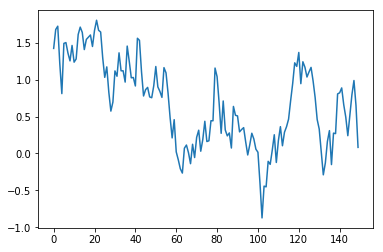

In [2]:
nCells = 100
nTime = 2000
alpha = 0.95

def zscore(data):
    return (data - np.nanmean(data)) / np.nanstd(data)

data = np.random.normal(0, 1, (nTime, nCells))
for iTime in range(1, nTime):
    data[iTime] = (1 - alpha) * data[iTime] + alpha * data[iTime-1]
    
# ZScore cells
for iCell in range(nCells):
    data[:, iCell] = zscore(data[:, iCell])
    
# Crop beginning where convolution saturates (do 3 exponents)
tCrop = int(-3/np.log(alpha))
data = data[tCrop:tCrop+150]
    
plt.figure()
plt.plot(data[:, 0])
plt.show()

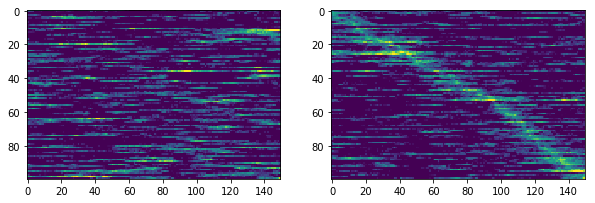

In [6]:
maxTimes = np.argmax(data, axis=0)

sortCellIdxs = np.argsort(maxTimes)

dataSorted = data[:, sortCellIdxs]

fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].imshow(data.T, vmin=0, vmax=3)
ax[1].imshow(dataSorted.T, vmin=0, vmax=3)
plt.show()